In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/YOLO_IOT

[Errno 2] No such file or directory: 'drive/MyDrive/YOLO_IOT'
/content/drive/MyDrive/YOLO_IOT


In [ ]:
ls

coco.names  image.jpg  image_yolo.jpeg  yolov4.cfg  yolov4.weights


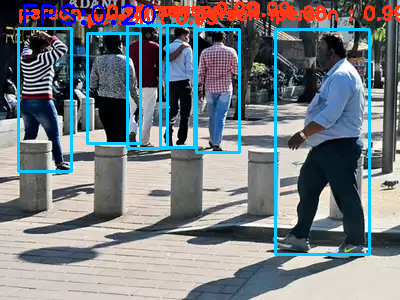

In [ ]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms= 0.3
class_names = []
with open("coco.names", "r") as f:
  class_names = [cname.strip() for cname in f.readlines()]
img = cv2.imread("image.jpg")
arc = cv2.dnn.readNet("yolov4.weights","yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640,640), scale=1/255, swapRB=True)
x =time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
y= time.time()
fps=1/(y-x)
for (classid, score, box) in zip(classes, scores, boxes):
  if isinstance(classid, (list, np.ndarray)):
    classid_value = classid[0]
  else:
    classid_value = classid
# Check if score is a list or a scalar
  if isinstance(score, (list, np.ndarray)):
    score_value = score[0]
  else:
    score_value = score
    label = "%s : %.2f" % (class_names[classid_value], score_value)
    cv2.rectangle(img,box,color=(255, 200, 10),thickness=2)
    cv2.putText(img, label, (box[0],box[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.6,(25,55,255),2)
    cv2.putText(img, "FPS:{0:.2f}".format(fps),(20, 25), cv2.FONT_HERSHEY_PLAIN,fontScale=2,color=(255, 0, 0),thickness=2)
cv2_imshow(img)

CODE WHICH DETECTS ALL THE OBJECTS

THE IMAGE IS: -

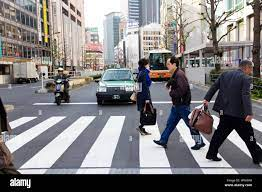

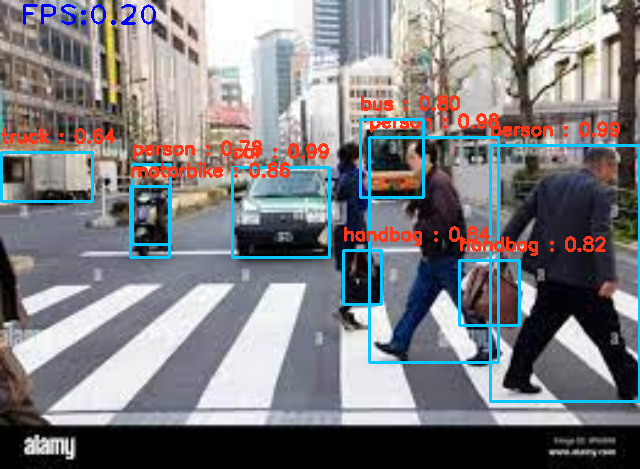

In [ ]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms = 0.3
class_names = []
with open("coco.names", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]

image_path = "/content/drive/MyDrive/YOLO_IOT/image_yolo.jpeg"
image = cv2.imread(image_path)

input_height = 640
input_width = 640
height, width = image.shape[:2]
aspect_ratio = width / height

if aspect_ratio > 1:
    new_width = input_width
    new_height = int(new_width / aspect_ratio)
else:
    new_height = input_height
    new_width = int(new_height * aspect_ratio)

resized_image = cv2.resize(image, (new_width, new_height))

arc = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)

model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(input_width, input_height), scale=1/255, swapRB=True)

x = time.time()
classes, scores, boxes = model.detect(resized_image, confidence, Nms)
y = time.time()
fps = 1 / (y - x)

for (classid, score, box) in zip(classes, scores, boxes):
    if isinstance(classid, (list, np.ndarray)):
        classid_value = classid[0]
    else:
        classid_value = classid

    if isinstance(score, (list, np.ndarray)):
        score_value = score[0]
    else:
        score_value = score

    label = "%s : %.2f" % (class_names[classid_value], score_value)
    cv2.rectangle(resized_image, box, color=(255, 200, 10), thickness=2)
    cv2.putText(resized_image, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (25, 55, 255), 2)

cv2.putText(resized_image, "FPS:{0:.2f}".format(fps), (20, 25), cv2.FONT_HERSHEY_PLAIN, fontScale=2, color=(255, 0, 0), thickness=2)

cv2_imshow(resized_image)


THE CODE WHICH DETECTS ONLY HUMANS

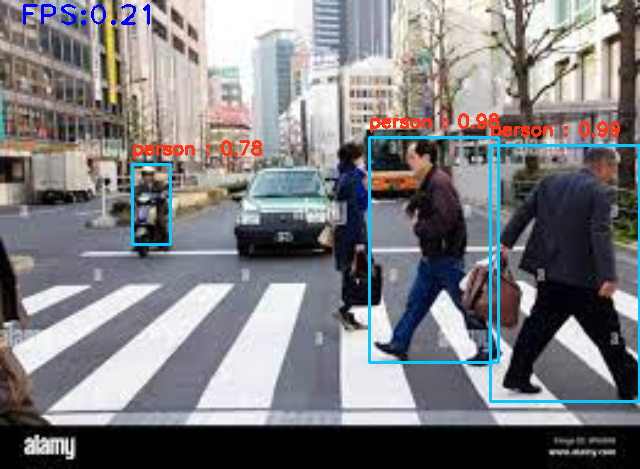

In [ ]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms = 0.3
class_names = []

with open("coco.names", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]

image_path = "/content/drive/MyDrive/YOLO_IOT/image_yolo.jpeg"
image = cv2.imread(image_path)

input_height = 640
input_width = 640
height, width = image.shape[:2]
aspect_ratio = width / height

if aspect_ratio > 1:
    new_width = input_width
    new_height = int(new_width / aspect_ratio)
else:
    new_height = input_height
    new_width = int(new_height * aspect_ratio)

resized_image = cv2.resize(image, (new_width, new_height))

arc = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)

model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(input_width, input_height), scale=1/255, swapRB=True)

x = time.time()
classes, scores, boxes = model.detect(resized_image, confidence, Nms)
y = time.time()
fps = 1 / (y - x)

# Filter class IDs to keep only humans (class ID 0)
human_indices = [i for i, class_id in enumerate(classes) if class_id == 0]
human_classes = [classes[i] for i in human_indices]
human_scores = [scores[i] for i in human_indices]
human_boxes = [boxes[i] for i in human_indices]

for (classid, score, box) in zip(human_classes, human_scores, human_boxes):
    if isinstance(classid, (list, np.ndarray)):
        classid_value = classid[0]
    else:
        classid_value = classid

    if isinstance(score, (list, np.ndarray)):
        score_value = score[0]
    else:
        score_value = score

    label = "%s : %.2f" % (class_names[classid_value], score_value)
    cv2.rectangle(resized_image, box, color=(255, 200, 10), thickness=2)
    cv2.putText(resized_image, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (25, 55, 255), 2)

cv2.putText(resized_image, "FPS:{0:.2f}".format(fps), (20, 25), cv2.FONT_HERSHEY_PLAIN, fontScale=2, color=(255, 0, 0), thickness=2)

cv2_imshow(resized_image)
